# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

### Weather Data Analysis
* Of the four weather measures were examined against changes in latitude, and the strongest correlation (-0.91) was found between Northern Hemisphere latitudes versus temperature. This relationship had a high r-squared value of 0.81 meaning that   81% of the variance in this data could be explained by the equation of the line from linear regression.
* As expected, as one approaches the equator the temperature the weather becomes significantly warmer, hence there is strong     correlation between max temerature and latitude.
* Most interesting is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere.
* There is very weak to no relationship between city latitudes and humidity, cloudiness and windspeed.
* It is interesting to see that a strong band of cities sits at 0%, 80%, and 100% cloudiness.

####  there were some weak correlations relationships with their r-squared values 
* Northern Hemisphere - Temperature (F) vs. Latitude r-squared 0.81
* Southern Hemisphere - Temperature (F) vs. Latitude r-squared 0.46
* Northern Hemisphere - Humidity (%) vs. Latitude r-squared 0.05
* Southern Hemisphere - Humidity (%) vs. Latitude r-squared 0.12
* Northern Hemisphere - Cloudiness (%) vs. Latitude r-squared 0.005
* Southern Hemisphere - Cloudiness (%) vs. Latitude r-squared 0.017
* Northern Hemisphere - Wind Speed (mph) vs. Latitude r-squared 0.051
* Southern Hemisphere - Wind Speed (mph) vs. Latitude r-squared 0.21

#### Some observable trends based on this data:

* Temperature decreases as you move north from the equator in the Northern Hemisphere in strongly linear fashion.
* Temperature decreases as you move south from the equator in the Southern Hemisphere in a weak linear fashion.
* In the Northern Hemisphere Humidity is very weakly correlated to increase as you increase in latitude.
* In the Southern Hemisphere Humidity is very weakly correlated to decrease as you move south in latitude.
* Cloudiness is not correlated to latitude in the Northern Hemisphere.
* Cloudiness is very weakly correlated to decrease as you move south in latitude in the Southern Hemisphere.
* Wind Speed is not correlated to latitude in the Northern Hemisphere, however in northern hemispheres there is a flurry of       cities  with over 20 mph of wind.
* In the Southern Hemisphere, Wind Speed is weakly correlated to increase as you move south in latitude.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import csv
from os import path
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# set figure size to 9x5
plt.rcParams['figure.figsize'] = [7, 5]

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities_count = len(cities)
print(cities_count)


585


In [3]:
# print(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# url + api key 

#One City Test


params = {'q': 'London',
          'APPID': weather_api_key,
          'units': 'Imperial'}

base_url = 'http://api.openweathermap.org/data/2.5/weather?'
city_response = requests.get(base_url, params=params)

city_json = city_response.json()


#print(city_json['name'])
print(city_json['name'])





London


In [5]:
print(json.dumps(city_json, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 51.51,
        "lon": -0.13
    },
    "dt": 1586658871,
    "id": 2643743,
    "main": {
        "feels_like": 46.74,
        "humidity": 71,
        "pressure": 1018,
        "temp": 50.56,
        "temp_max": 55.99,
        "temp_min": 44.6
    },
    "name": "London",
    "sys": {
        "country": "GB",
        "id": 1417,
        "sunrise": 1586668217,
        "sunset": 1586717501,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 180,
        "speed": 3.36
    }
}


In [6]:

# retrieve city weather data and write to csv file

if path.exists("output_data/cities.csv"):
    print("cities.csv generated!")
else:
    with open(output_data_file, 'w', newline='') as csvfile:
        csvwriter = csv.writer(csvfile, delimiter=',')
        csvwriter.writerow(['City','Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed'])



print('Beginning Data Retrieval')
print('----------------------------------------------------------------------')
city_json = []
for city in cities:
    params = {'q': city,
             'APPID': weather_api_key,
             'units': 'imperial'}
    
    index = cities.index(city) + 1
    
    try:
        print('Processing City # {} | {}'.format(index, city))
        request = requests.get(base_url, params=params)
        city_json.append(request.json())
        
    except:
        print('City: {} not found. skipping.....................'.format(city))
print('------------------------------------------------------------------------')
print('Data Retrieval Complete')

cities.csv generated!
Beginning Data Retrieval
----------------------------------------------------------------------
Processing City # 1 | cape town
Processing City # 2 | albany
Processing City # 3 | bluff
Processing City # 4 | verkhniy baskunchak
Processing City # 5 | inirida
Processing City # 6 | klaksvik
Processing City # 7 | cherskiy
Processing City # 8 | constitucion
Processing City # 9 | lavrentiya
Processing City # 10 | tecoanapa
Processing City # 11 | lashio
Processing City # 12 | odessa
Processing City # 13 | avarua
Processing City # 14 | upernavik
Processing City # 15 | carnarvon
Processing City # 16 | abu samrah
Processing City # 17 | jamestown
Processing City # 18 | namibe
Processing City # 19 | vaini
Processing City # 20 | chuy
Processing City # 21 | barrow
Processing City # 22 | tarudant
Processing City # 23 | bayanday
Processing City # 24 | ojinaga
Processing City # 25 | zhigansk
Processing City # 26 | taitung
Processing City # 27 | vila
Processing City # 28 | camocim
P

Processing City # 246 | balabac
Processing City # 247 | voronovytsya
Processing City # 248 | palabuhanratu
Processing City # 249 | hithadhoo
Processing City # 250 | kenora
Processing City # 251 | rocha
Processing City # 252 | castro
Processing City # 253 | sergeyevka
Processing City # 254 | la ronge
Processing City # 255 | cockburn town
Processing City # 256 | mastic beach
Processing City # 257 | aksu
Processing City # 258 | swindon
Processing City # 259 | najran
Processing City # 260 | chapais
Processing City # 261 | guaratuba
Processing City # 262 | dhandhuka
Processing City # 263 | belmonte
Processing City # 264 | torbay
Processing City # 265 | nouadhibou
Processing City # 266 | cariamanga
Processing City # 267 | samusu
Processing City # 268 | iberia
Processing City # 269 | islamkot
Processing City # 270 | orlik
Processing City # 271 | kavaratti
Processing City # 272 | vila franca do campo
Processing City # 273 | broome
Processing City # 274 | vilyuysk
Processing City # 275 | fonte 

Processing City # 495 | salalah
Processing City # 496 | nome
Processing City # 497 | nicolas bravo
Processing City # 498 | borba
Processing City # 499 | alekseyevsk
Processing City # 500 | khartoum
Processing City # 501 | bonthe
Processing City # 502 | tukrah
Processing City # 503 | pisco
Processing City # 504 | bredy
Processing City # 505 | trinidad
Processing City # 506 | port augusta
Processing City # 507 | kasangulu
Processing City # 508 | jalingo
Processing City # 509 | egvekinot
Processing City # 510 | jardim
Processing City # 511 | atasu
Processing City # 512 | coshocton
Processing City # 513 | pangkalanbuun
Processing City # 514 | mingshui
Processing City # 515 | puerto leguizamo
Processing City # 516 | baykit
Processing City # 517 | meulaboh
Processing City # 518 | rawatsar
Processing City # 519 | college
Processing City # 520 | monroe
Processing City # 521 | nadym
Processing City # 522 | amos
Processing City # 523 | vondrozo
Processing City # 524 | galle
Processing City # 525

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
cities=[]
err_count = 0
for city in city_json:
    try:
        city_to_append = {'City': city['name'],
                          'Cloudiness': city['clouds']['all'],
                          'Country': city['sys']['country'],
                          'Date': city['dt'],
                          'Humidity': city['main']['humidity'],
                          'Latitude': city['coord']['lat'],
                          'Longitude': city['coord']['lon'],
                          'Temperature': city['main']['temp_max'],
                          'Wind Speed': city['wind']['speed'] 
                          
                         }
        cities.append(city_to_append)
    except:
        err_count += 1
city_df = pd.DataFrame(cities)
city_df.count()

City           526
Cloudiness     526
Country        526
Date           526
Humidity       526
Latitude       526
Longitude      526
Temperature    526
Wind Speed     526
dtype: int64

In [8]:
# Export the city data into a .csv.

city_df.to_csv('output_data\weather_by_city.csv', index=False)

# Display the DataFrame
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Temperature,Wind Speed
0,Cape Town,90,ZA,1586658870,93,-33.93,18.42,64.99,27.51
1,Albany,1,US,1586658894,50,42.60,-73.97,39.99,6.93
2,Bluff,20,NZ,1586658894,51,-46.60,168.33,71.01,5.99
3,Verkhniy Baskunchak,0,RU,1586658894,73,48.23,46.72,38.26,16.71
4,Inírida,64,CO,1586658894,88,3.87,-67.92,75.88,1.66


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

###  Build series of Sctter plots to showcase the following relationships:
* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

* After each plot add a sentence or too explaining what the code is and analyzing.

### Latitude vs. Temperature Plot

#### This code is analyzing the max temperature of each city and latitude.

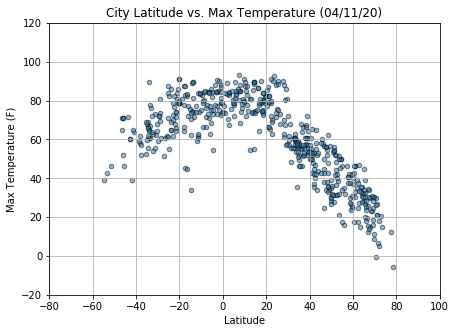

In [9]:

city_df.plot.scatter('Latitude', 'Temperature', alpha=0.5, edgecolors='black')
plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%m/%d/%y')})")
plt.xlabel('Latitude') 
plt.ylabel('Max Temperature (F)')
plt.xlim(-80,100)
plt.ylim(-20, 120)
#plt.ylim(min([Temperature])-20,max([Temperature])+20)
plt.grid()


plt.savefig('output_data\Lat_Vs_Temp.png')

plt.show()
    
    
    
    


### Latitude vs. Humidity Plot
    
#### This code is analyzing the humidity of each city and latitude.

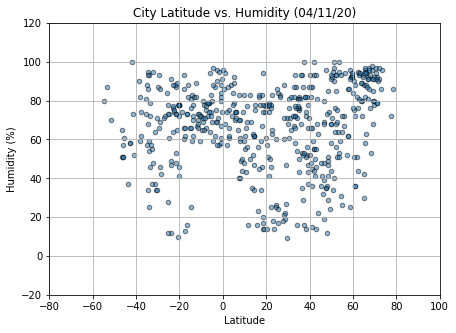

In [10]:
city_df.plot.scatter('Latitude', 'Humidity', alpha=0.5, edgecolors='black')
plt.title(f"City Latitude vs. Humidity ({time.strftime('%m/%d/%y')})")
plt.xlabel('Latitude') 
plt.ylabel('Humidity (%)')
plt.xlim(-80,100)
plt.ylim(-20, 120)

plt.grid()


plt.savefig('output_data\Lat_Vs_Humidity.png')

plt.show()
    
    
    


### Latitude vs. Cloudiness Plot

#### This code is analyzing the Cloudiness of each city and latitude.    


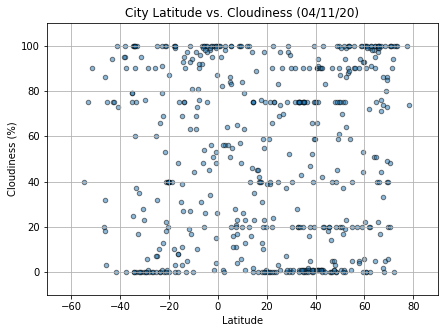

In [11]:
city_df.plot.scatter('Latitude', 'Cloudiness', alpha=0.5, edgecolors='black')
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%m/%d/%y')})")
plt.xlabel('Latitude') 
plt.ylabel('Cloudiness (%)')
plt.xlim(-70,90)
plt.ylim(-10, 110)

plt.grid()


plt.savefig('output_data\Lat_Vs_Cloudiness.png')

plt.show()
       


###  Latitude vs. Wind Speed Plot

#### This code is analyzing the speed of wind of each city and latitude.

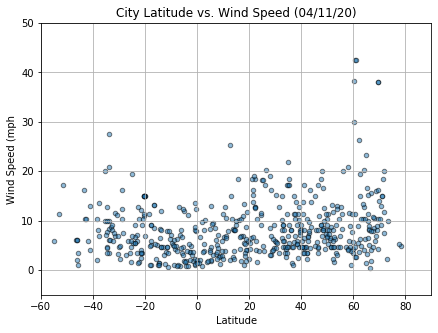

In [12]:
city_df.plot.scatter('Latitude', 'Wind Speed', alpha=0.5, edgecolors='black')
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%m/%d/%y')})")
plt.xlabel('Latitude') 
plt.ylabel('Wind Speed (mph')
plt.xlim(-60,90)
plt.ylim(-5, 50)

plt.grid()


plt.savefig('output_data\Lat_Vs_WindSpeed.png')

plt.show()



## Linear Regression

In [13]:

# OPTIONAL: Create a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values, alpha=0.5)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    
    print(f"Equation of regrssion line is: {line_eq}")
    print(f"The correlation is: {rvalue}")
   
    print(f"The r-squared is: {(rvalue)**2}")
    plt.show()

In [14]:
# Create Northern and Southern Hemisphere DataFrames
northlat_df = city_df.loc[city_df["Latitude"] >= 0,:]


northlat_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Temperature,Wind Speed
1,Albany,1,US,1586658894,50,42.60,-73.97,39.99,6.93
3,Verkhniy Baskunchak,0,RU,1586658894,73,48.23,46.72,38.26,16.71
4,Inírida,64,CO,1586658894,88,3.87,-67.92,75.88,1.66
5,Klaksvík,99,FO,1586658895,76,62.23,-6.59,37.40,26.40
6,Cherskiy,80,RU,1586658853,96,68.75,161.30,23.36,15.97


In [15]:
southlat_df = city_df.loc[city_df["Latitude"] < 0,:]
southlat_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Temperature,Wind Speed
0,Cape Town,90,ZA,1586658870,93,-33.93,18.42,64.99,27.51
2,Bluff,20,NZ,1586658894,51,-46.60,168.33,71.01,5.99
7,Constitución,75,CL,1586658888,81,-35.33,-72.42,52.57,10.02
12,Avarua,100,CK,1586658896,89,-21.21,-159.78,84.20,3.36
14,Carnarvon,7,AU,1586658897,61,-24.87,113.63,82.40,19.46


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Equation of regrssion line is: y = -1.0x + 93.01
The correlation is: -0.9085724816918483
The r-squared is: 0.8255039544876841


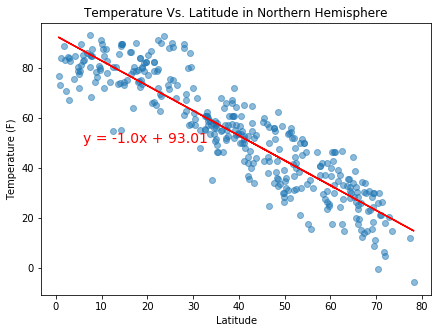

<Figure size 504x360 with 0 Axes>

In [16]:

x_values = northlat_df["Latitude"]
y_values = northlat_df["Temperature"]
plt.title('Temperature Vs. Latitude in Northern Hemisphere')

plot_linear_regression(x_values,y_values,'Temperature (F)',(6,50))

plt.savefig('output_data/NorthLat_Vs.Temperature.png')
# SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 11-12: malformed \N character escape
# Do no tuse \n... or \N...


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Equation of regrssion line is: y = 0.49x + 81.81
The correlation is: 0.5582705372511846
The r-squared is: 0.3116659927627263


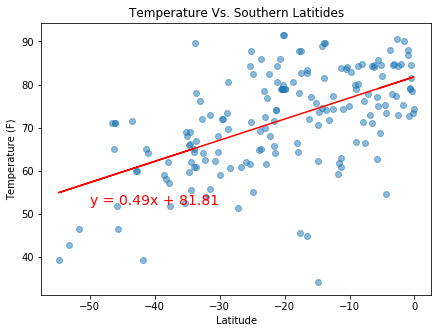

<Figure size 504x360 with 0 Axes>

In [17]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Temperature"]
plt.title('Temperature Vs. Southern Latitides')


plot_linear_regression(x_values,y_values,'Temperature (F)',(-50,52))

plt.savefig('output_data/SouthLat_Vs_Temperature.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Equation of regrssion line is: y = 0.32x + 54.05
The correlation is: 0.27759733913895074
The r-squared is: 0.07706028269702563


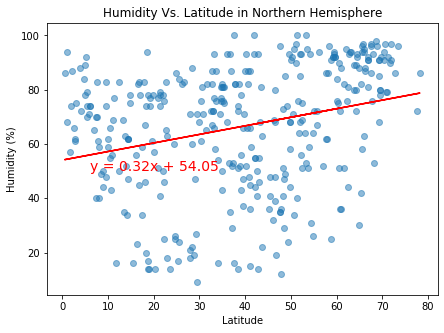

<Figure size 504x360 with 0 Axes>

In [18]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Humidity"]
plt.title('Humidity Vs. Latitude in Northern Hemisphere')

plot_linear_regression(x_values,y_values,'Humidity (%)',(6,50))
plt.savefig('output_data/NorthLat_Vs_Humidity.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Equation of regrssion line is: y = 0.3x + 74.75
The correlation is: 0.2169268929389416
The r-squared is: 0.04705727688014303


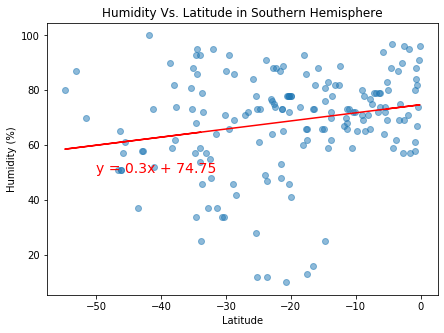

<Figure size 504x360 with 0 Axes>

In [19]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Humidity"]
plt.title('Humidity Vs. Latitude in Southern Hemisphere')

plot_linear_regression(x_values,y_values,'Humidity (%)',(-50,50))

plt.savefig('output_data/SouthLat_Vs_Humidity.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Equation of regrssion line is: y = 0.29x + 37.84
The correlation is: 0.15519838556776352
The r-squared is: 0.02408653888284019


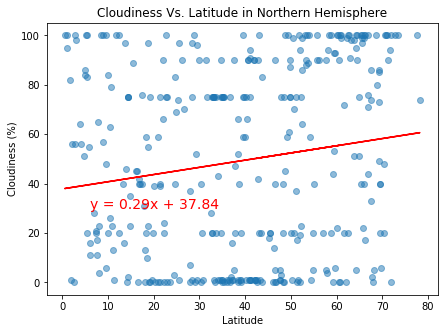

<Figure size 504x360 with 0 Axes>

In [20]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Cloudiness"]
plt.title('Cloudiness Vs. Latitude in Northern Hemisphere')

plot_linear_regression(x_values,y_values,'Cloudiness (%)',(6,30))

plt.savefig('output_data/NorthLat_Vs_Cloudiness.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Equation of regrssion line is: y = 0.41x + 61.99
The correlation is: 0.14296353807239323
The r-squared is: 0.020438573218176628


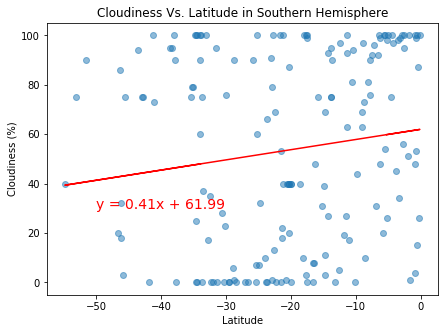

<Figure size 504x360 with 0 Axes>

In [21]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Cloudiness"]
plt.title('Cloudiness Vs. Latitude in Southern Hemisphere')

plot_linear_regression(x_values,y_values,'Cloudiness (%)',(-50,30))

plt.savefig('output_data/SouthLat_Vs_Cloudiness.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Equation of regrssion line is: y = 0.07x + 5.92
The correlation is: 0.23145556692715297
The r-squared is: 0.053571679461569786


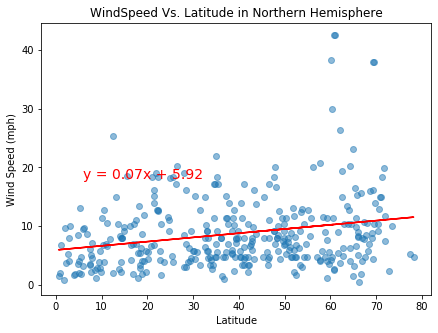

<Figure size 504x360 with 0 Axes>

In [22]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Wind Speed"]
plt.title('WindSpeed Vs. Latitude in Northern Hemisphere')

plot_linear_regression(x_values,y_values,'Wind Speed (mph)',(6,18))

plt.savefig('output_data/NorthLat_Vs_WindSpeed.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Equation of regrssion line is: y = -0.1x + 4.68
The correlation is: -0.29917731072695875
The r-squared is: 0.08950706325381523


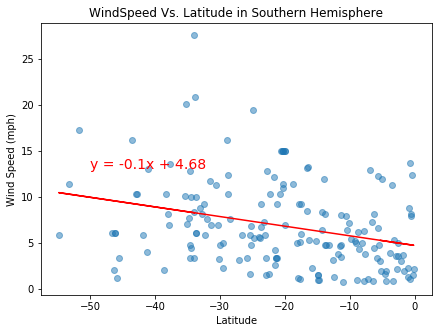

<Figure size 504x360 with 0 Axes>

In [23]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Wind Speed"]
plt.title('WindSpeed Vs. Latitude in Southern Hemisphere')

plot_linear_regression(x_values,y_values,'Wind Speed (mph)',(-50,13))

plt.savefig('output_data\SouthLat_Vs_WindSpeed.png')